# Exploratory Data Analysis

In [1]:
#from sklearn.pipeline import Pipeline
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [3]:
df = pd.read_csv("modified-tweets.csv") 
new_df = pd.read_csv("relabeled_first_half.csv") 
third = pd.read_csv("labeled_second_half.csv")
df = df.append(new_df, ignore_index=True)
df = df.append(third, ignore_index=True)
df.drop(columns=["description"], inplace=True)
df.dropna()
df


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,label,tweets
0,1,'A MESSAGE TO THE TRUTHFUL IN SYRIA - SHEIKH ...
1,1,SHEIKH FATIH AL JAWLANI 'FOR THE PEOPLE OF IN...
2,1,FIRST AUDIO MEETING WITH SHEIKH FATIH AL JAWL...
3,1,"SHEIKH NASIR AL WUHAYSHI (HA), LEADER OF AQAP..."
4,1,AQAP: 'RESPONSE TO SHEIKH BAGHDADIS STATEMENT...
5,1,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...
6,1,ENGLISH TRANSCRIPT : OH MURABIT! :
7,1,'A COLLECTION OF THE WORDS OF THE U'LAMA REGA...
8,1,Aslm Please share our new account after the pr...
9,1,AQAP STATEMENT REGARDING THE BLESSED RAID IN ...


,label
count,35533.000000
mean,0.489967
std,0.499906
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


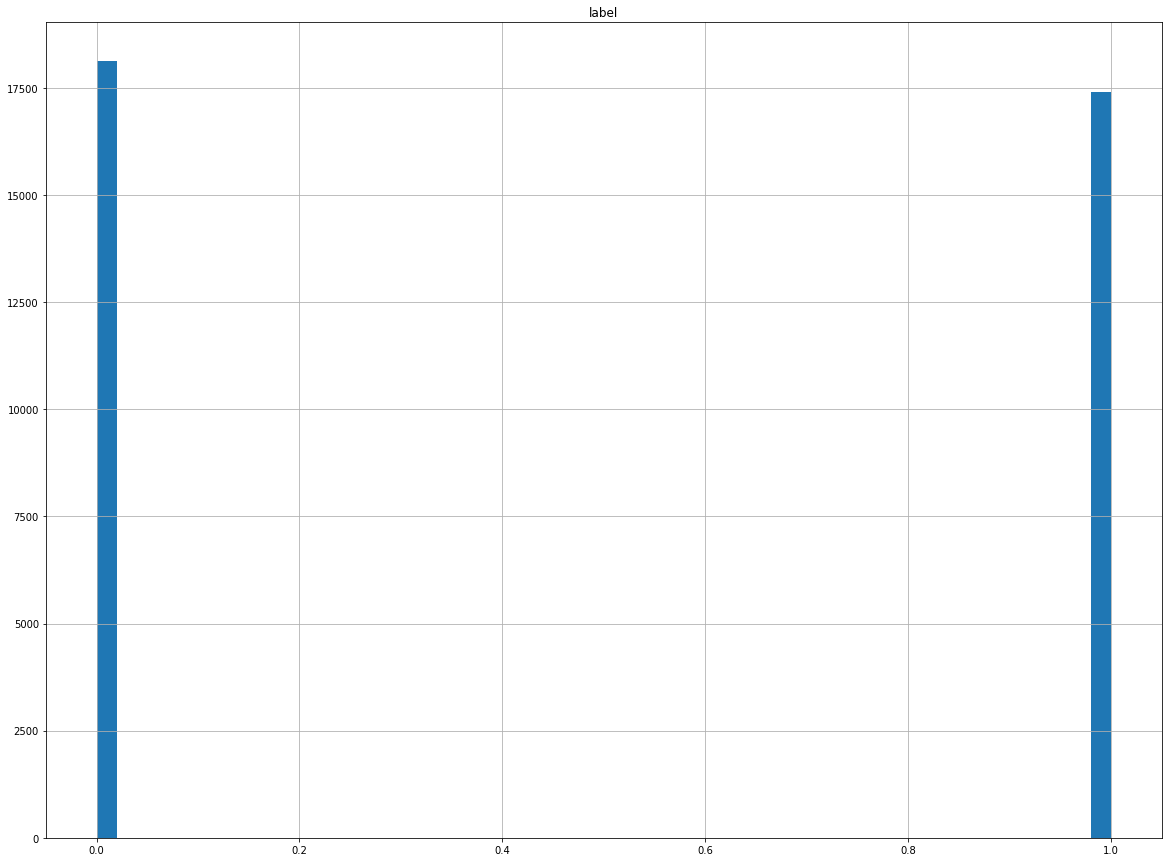

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15))
df.describe()

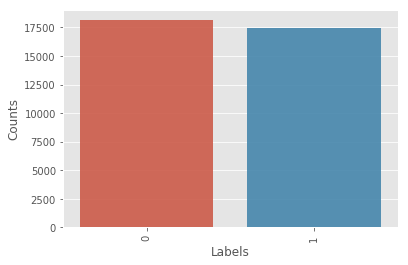

In [60]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

label_counts = df['label'].value_counts()

sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Labels', fontsize = 12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [61]:
shuffle = df.sample(frac=1)
shuffle.head()

,label,tweets
25857,0,@krassenstein @JoeBiden pft. trump running jug...
18620,0,#MAGA
30503,0,@BalochRzaa @Zwei_Augen @IlhanMN Btw with my i...
9571,1,@MaV_7778: #_#_ #Schaerbeek #Bruxelles
17907,0,@Fdr1942 @_cingraham I doubt that. Look at the...


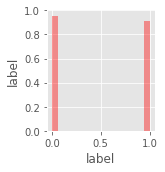

In [62]:
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24) 

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [5]:
def partition(X, y,t):
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    return X_train, y_train, X_test, y_test

X = df.drop(columns=["label"])
y = df["label"]

X_train, y_train, X_test, y_test = partition(X, y, 0.2)
print("X size: ", len(X))
print("X_train size: ", len(X_train))
print("X_test size: ", len(X_test))
print("y_train size: ", len(y_train))
print("y_test size: ", len(y_test))


X size:  35533
X_train size:  28427
X_test size:  7106
y_train size:  28427
y_test size:  7106


# Feature Extraction

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud

nltk.download('wordnet')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

df['text_lemmatized'] = df['tweets'].map(lambda text: ' '.join(lemmatizer.lemmatize(w) for w in nltk.word_tokenize(str(text).lower())))

X_lemmatized = df['text_lemmatized']

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lramirez5/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /Users/lramirez5/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


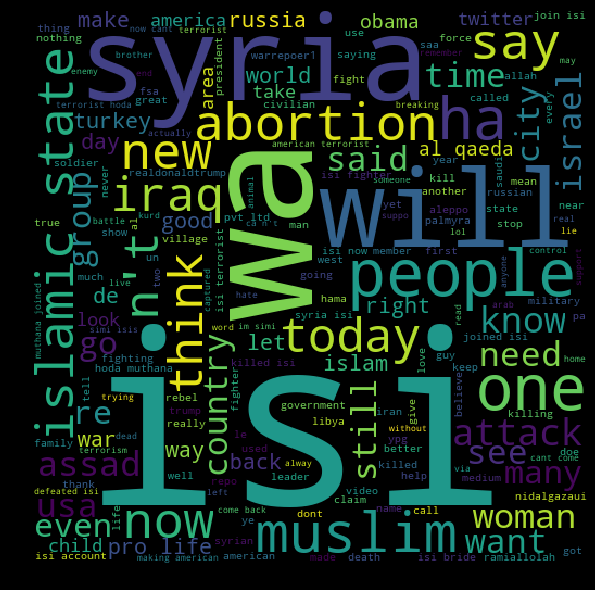

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# entire dataset
words = ''.join(list(df['text_lemmatized']))
wordcloud = WordCloud(width = 512,height = 512).generate(words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()



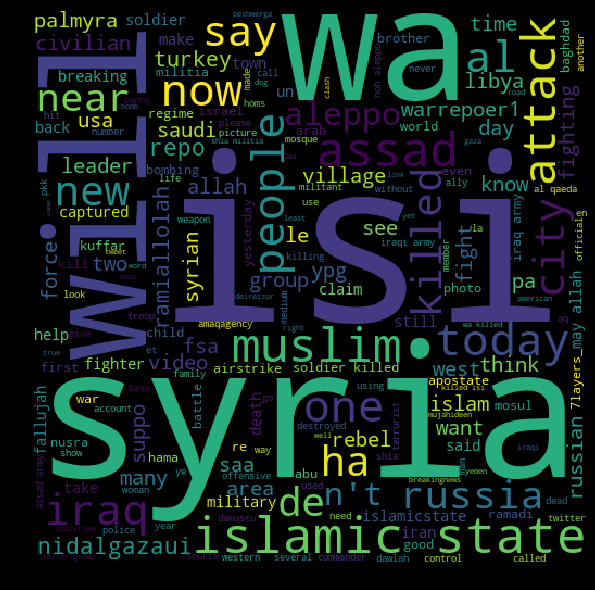

In [66]:
# isis dataset
isis_words = ''.join(list(df[df['label']==1]['text_lemmatized']))
isis_wordcloud = WordCloud(width = 512,height = 512).generate(isis_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(isis_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

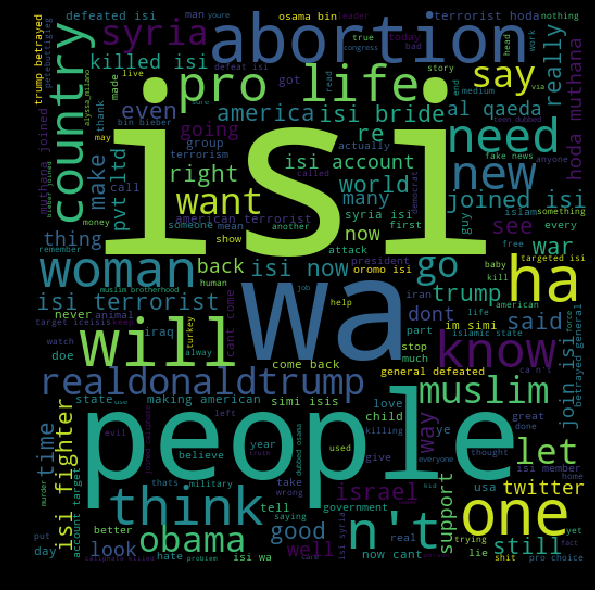

In [67]:
# non-isis dataset
nonisis_words = ''.join(list(df[df['label']==0]['text_lemmatized']))
nonisis_wordcloud = WordCloud(width = 512,height = 512).generate(nonisis_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(nonisis_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [8]:
def partition(X, y, t):
    X_test = X[:int(t*len(X))]
    y_test = y[:int(t*len(y))]
    X_train = X[int(t*len(X)):]
    y_train = y[int(t*len(y)):]
    
    return X_train, y_train, X_test, y_test

# X = (X - X.mean())/X.std()
y = df['label']

X_train, y_train, X_test, y_test = partition(X_lemmatized, y, 0.2)


In [9]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [12]:
#count_vect = CountVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 2))
#count_vect = CountVectorizer(lowercase=True, stop_words='english')
#count_vect = CountVectorizer(lowercase=True, stop_words='english', binary=True)
count_vect = CountVectorizer()


X_train_counts = count_vect.fit_transform(X_train)
print(X_train_counts.shape)

print("Type of the occurance count matrix (should be sparse): ")
print(type(X_train_counts))

X_test_counts = count_vect.transform(X_test)
print(X_test_counts.shape)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

X_test_tfidf = tfidf_transformer.transform(X_test_counts)
print(X_test_tfidf.shape)


(28427, 38771)
Type of the occurance count matrix (should be sparse): 
<class 'scipy.sparse.csr.csr_matrix'>
(7106, 38771)
(28427, 38771)
(7106, 38771)


# Naive Bayes

Prior to dimension reduction. 

In [13]:
from sklearn.metrics import accuracy_score
import numpy as np

In [14]:
%%time

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(),y_train)
y_predict = gnb.predict(X_test_tfidf.toarray())

CPU times: user 32.4 s, sys: 43.5 s, total: 1min 15s
Wall time: 1min 14s


In [15]:

accuracy_score_test = np.mean(y_predict == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Accuracy:  0.8505488319729806

Test Confusion Matrix:
[[   0    0]
 [1062 6044]]

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.85      0.92      7106

avg / total       1.00      0.85      0.92      7106



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [16]:
%%time 
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train_tfidf.toarray(), y_train)
y_predict = clf.predict(X_test_tfidf.toarray())

CPU times: user 24.2 s, sys: 27.4 s, total: 51.6 s
Wall time: 41.4 s


In [17]:
accuracy_score_test = np.mean(y_predict == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Accuracy:  0.8014354066985646

Test Confusion Matrix:
[[   0    0]
 [1411 5695]]

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.80      0.89      7106

avg / total       1.00      0.80      0.89      7106



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [18]:
%%time 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf.toarray(), y_train)
y_predict = nb_model.predict(X_test_tfidf.toarray())

CPU times: user 6.78 s, sys: 3.99 s, total: 10.8 s
Wall time: 9.67 s


In [19]:
accuracy_score_test = np.mean(y_predict == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_predict))


print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Accuracy:  0.6056853363354912

Test Confusion Matrix:
[[   0    0]
 [2802 4304]]

Classification Report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.61      0.75      7106

avg / total       1.00      0.61      0.75      7106



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:



import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

bigrams = ngrams(token,2)
trigrams = ngrams(token,3)
fourgrams = ngrams(token,4)
fivegrams = ngrams(token,5)

for i in range(len(X_train_lemmatized)):
    splitted_tweet = list(X_train_lemmatized[i])
    splitted_tweet.pop(0)
    unsplitted_tweet = ''.join(splitted_tweet)
    X_train_lemmatized[i] = unsplitted_tweet

In [28]:
y_test.shape

(7106,)

In [ ]:
%%time

for n in [1,2,3]:
    vectorizer = CountVectorizer(analyzer='word', ngram_range=(n,n))
    X_train_counts = vectorizer.fit_transform(X_train)
    print(X_train_counts.shape)
    X_test_counts = vectorizer.transform(X_test)
    print(X_test_counts.shape)

    model = GaussianNB()
    
    model.fit(X_train_counts.toarray(),y_train)
    y_predict = model.predict(X_test_counts.toarray())

    accuracy_score_test = np.mean(y_predict == y_test)
    print(str(n)+'-gram accuracy:', accuracy_score_test)

(28427, 38771)
(7106, 38771)
1-gram accuracy: 0.8986771742189699
(28427, 196259)
(7106, 196259)
2-gram accuracy: 0.774556712637208
(28427, 297498)
(7106, 297498)
